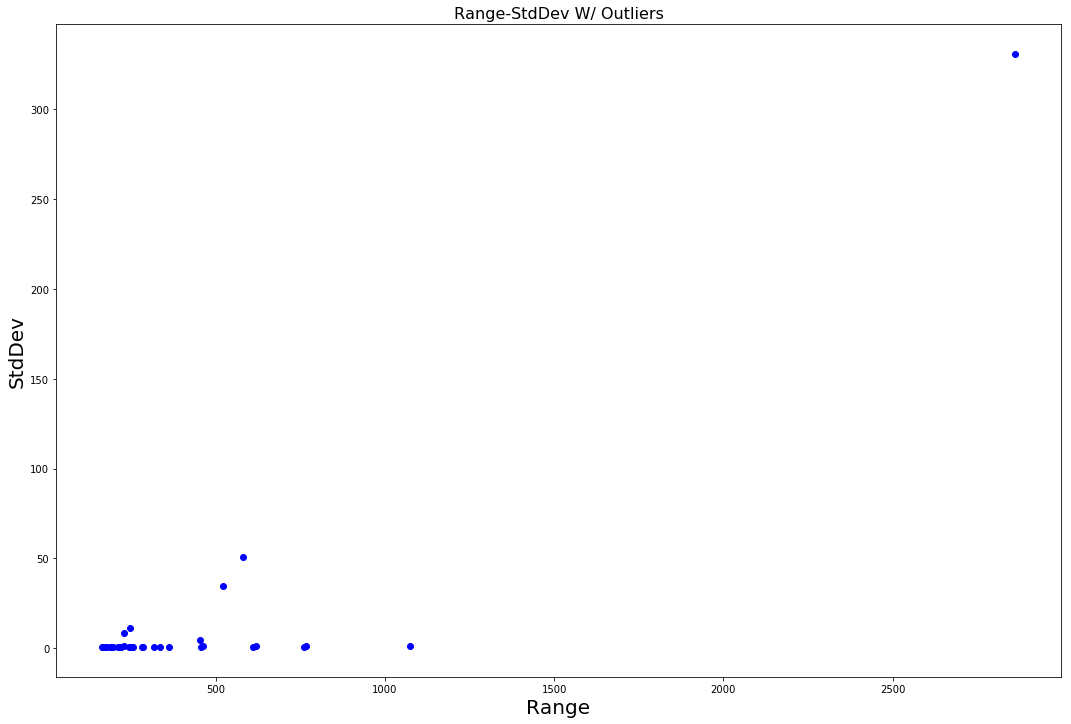

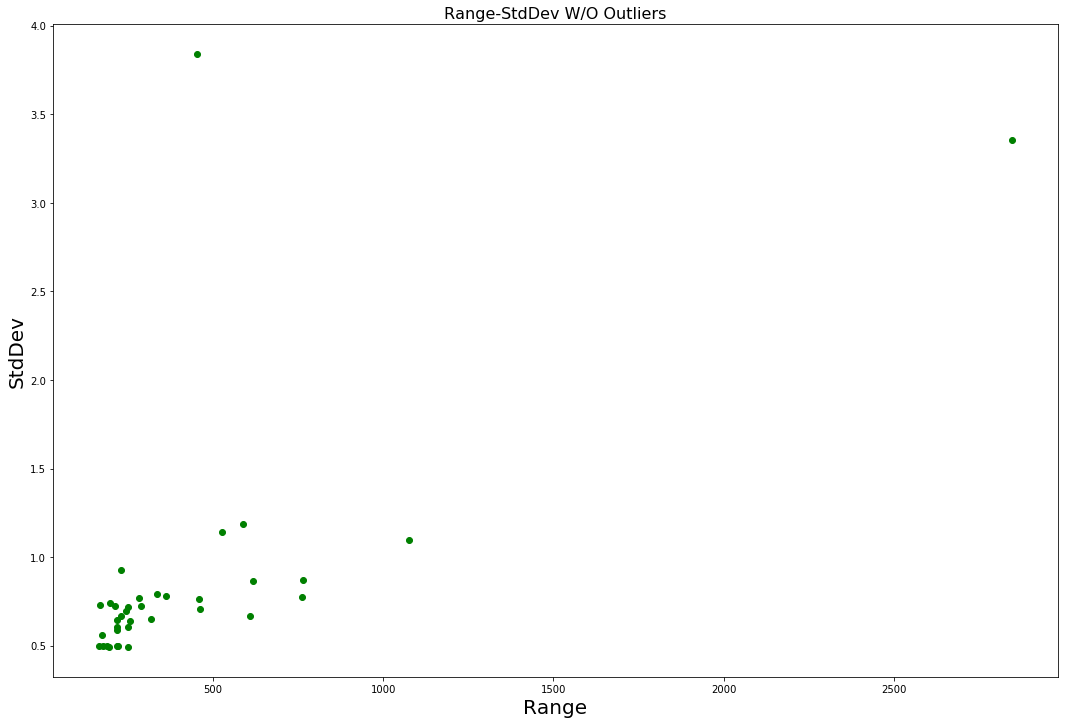

Correlation Coefficient: 0.652635492669917


In [3]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path = sys.path[2:]

plt.rcParams["figure.figsize"] = [18, 12]

MAX_READING = 4000
MIN_READING = 5

FILENAME_TEMPLATE = "LIDAR_100ms_Degrees_{:#03}.csv"

raw_data = []

def to_array(data):
    return np.array([int(v) for v in data.split(os.linesep)[:-1]])

def sanitize_data(data, stddev_step=2):
    mean = np.mean(data)
    std = np.std(data)
    min_value = mean - stddev_step * std
    max_value = mean + stddev_step * std
    selection = np.logical_and(data >= min_value, data <= max_value)
    return data[selection]

for degree in range(0, 360, 10):
    lidar_file = FILENAME_TEMPLATE.format(degree)
    with open(lidar_file, "r") as f:
        raw_data.append(to_array(f.read()))

clean_data = [sanitize_data(vals) for vals in raw_data]
        
mean_std_w_outliers = [(np.mean(vals), np.std(vals)) for vals in raw_data]

for mean, std in mean_std_w_outliers:
    plt.plot(mean, std, marker='o', color='blue')
    
plt.xlabel("Range", fontsize=20)
plt.ylabel("StdDev", fontsize=20)
plt.title("Range-StdDev W/ Outliers", fontsize=16)
plt.show()

clean_mean_std = [(np.mean(vals), np.std(vals)) for vals in clean_data]

for mean, std in clean_mean_std:
    plt.plot(mean, std, marker='o', color='green')

means = np.array([t[0] for t in clean_mean_std])
stds = np.array([t[1] for t in clean_mean_std])

corr = np.corrcoef(stds, means)

plt.xlabel("Range", fontsize=20)
plt.ylabel("StdDev", fontsize=20)
plt.title("Range-StdDev W/O Outliers", fontsize=16)
plt.show()

print(f"Correlation Coefficient: {corr[0][1]}")


#### Part A

Plotting the range and stddev data without removing the outliers does not show an obvious trend, but after removing them the trend becomes clearer. Standard deviation increases as the range increases, and has a positive correlation coefficent of 0.65 as shown above. In short, standard deviation does have dependence on the range being measured.

#### Part B

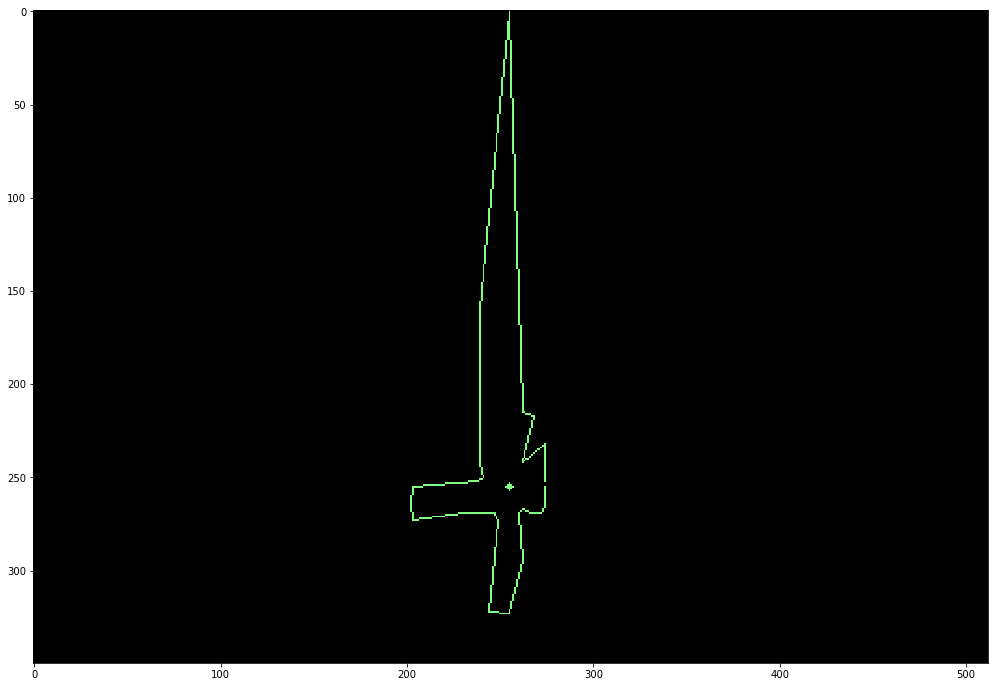

In [4]:
import math
import cv2

GREEN = (128, 255, 128)
THICKNESS = 1
SIZE = 512
CENTER = np.array([255, 255])

def to_point(center, mean, theta):
    rads = math.radians(theta)
    x = int(np.cos(rads) * mean)
    y = int(np.sin(rads) * mean)
    return tuple(np.array([x, y]) + center)

normalized_means = (means / np.max(means)) * (SIZE / 2 - 1)

img = np.zeros((SIZE, SIZE, 3), np.uint8)
cv2.circle(img, tuple(CENTER), 2, GREEN, -1)

thetas = range(10, 360, 10)
prev_point = to_point(CENTER, normalized_means[0], 0)

for theta, mean in zip(thetas, normalized_means[1:]):
    next_point = to_point(CENTER, mean, theta)
    cv2.line(img, prev_point, next_point, GREEN, THICKNESS)
    prev_point = next_point


cut_img = img[:350]
plt.imshow(cut_img)
plt.show()